In [1]:
# load efficiency scripts 
import sys
sys.path.append('../scripts/')
from battery_efficiency import BatteryEfficiency

In [2]:
# Parameters for the battery efficiency
cr = 1_000
pr = 500

In [3]:
batt_deg = BatteryEfficiency(cr * 1000)

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define a range of SoC values
soc_values = np.linspace(0.2, 1.0, 100)  # 100 values from 0.2 to 1.0

# Define a list of C rates
c_rates = [1, 0.8, 0.6, 0.4, 0.2]

# Initialize a BatteryEfficiency object
batt_eff = BatteryEfficiency(cr * 1000)

# Initialize dictionaries to store charging and discharging efficiencies
char_eff = {}
disch_eff = {}

# c-rate = I / capacity #### I = C-rate * capacity
# P = V * I  ### P = V * C-rate * capacity
# 

# For each C rate, calculate the charging and discharging efficiency at each SoC value
for c_rate in c_rates:
    char_eff[c_rate] = []
    disch_eff[c_rate] = []
    pr = cr * c_rate * 1000
    for soc in soc_values:
        char_eff[c_rate].append(batt_eff.calc_efficiency_all(soc, pr))
        disch_eff[c_rate].append(batt_eff.calc_efficiency_all(soc, -pr))


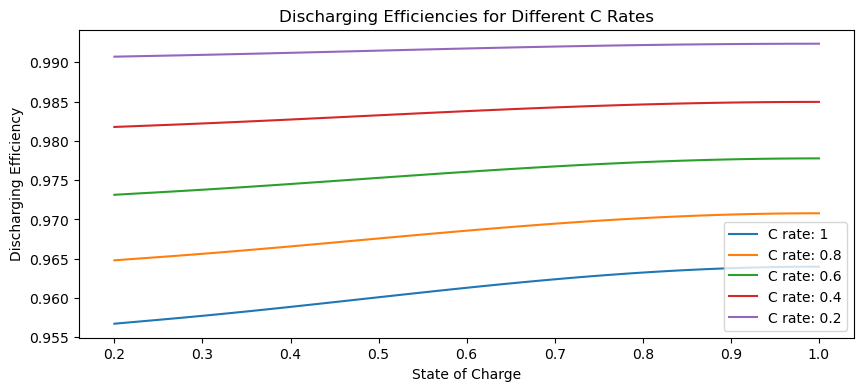

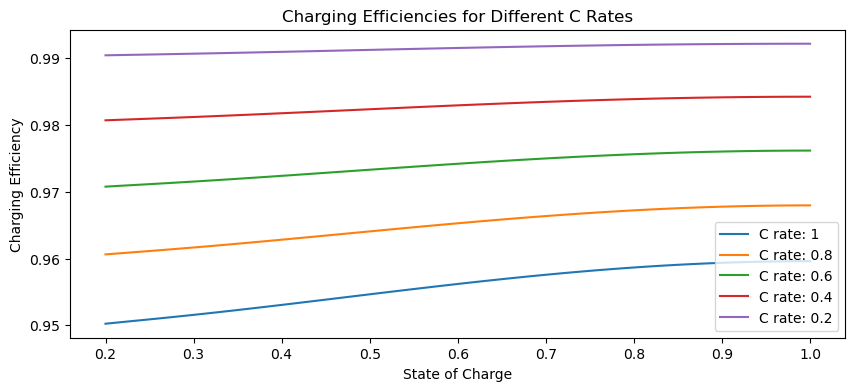

In [8]:
# Plot the charging efficiencies

# Plot the discharging efficiencies
plt.figure(figsize=(10, 4))
for c_rate in c_rates:
    plt.plot(soc_values, disch_eff[c_rate], label=f'C rate: {c_rate}')
plt.xlabel('State of Charge')
plt.ylabel('Discharging Efficiency')
plt.legend()
plt.title('Discharging Efficiencies for Different C Rates')
plt.show()

plt.figure(figsize=(10, 4))
for c_rate in c_rates:
    plt.plot(soc_values, char_eff[c_rate], label=f'C rate: {c_rate}')
plt.xlabel('State of Charge')
plt.ylabel('Charging Efficiency')
plt.legend()
plt.title('Charging Efficiencies for Different C Rates')
plt.show()


In [6]:
v_oc, r_tot, r_s, r_st, r_tl = batt_eff.ss_circuit_model(1)
v_oc, r_tot, r_s, r_st, r_tl

(1162972223.1526,
 52416666.708602905,
 32277777.803602908,
 12138888.8986,
 8000000.006399999)